<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0606/blob/main/transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
path = "/content/drive/MyDrive/additional/train.zip"
f = zipfile.ZipFile(path)
f.extractall()

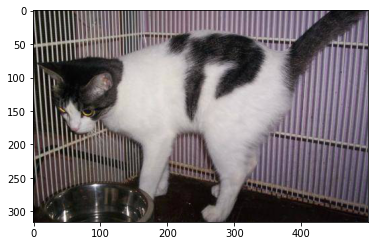

In [16]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
fs = glob.glob("train/*")
plt.imshow(Image.open(fs[20]))

In [26]:
import random
import pandas as pd
dogs = glob.glob("train/dog.*")
random.shuffle(dogs)
cats = glob.glob("train/cat.*")
random.shuffle(cats)
train = pd.DataFrame({
    "path":dogs[:900] + cats[:900],
    "target":[0] * 900 + [1] * 900
})
validate = pd.DataFrame({
    "path":dogs[900:950] + cats[900:950],
    "target":[0] * 50 + [1] * 50
})
test = pd.DataFrame({
    "path":dogs[950:1000] + cats[950:1000],
    "target":[0] * 50 + [1] * 50
})

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
for l in vgg.layers:
    l.trainable = False
layers = [
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
layers = vgg.layers + layers
model = Sequential(layers)
model.summary()

In [35]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [36]:
import numpy as np

In [56]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
fs = glob.glob("train/*")
target = fs[20]

# 預處理(要照你偷來的模型做)
from tensorflow.keras.applications.vgg16 import preprocess_input
img = Image.open(target).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img))
print(img_np)

[[[  55.060997   46.221      40.32    ]
  [ -63.939003  -72.779     -78.68    ]
  [ -95.939    -104.779    -110.68    ]
  ...
  [ -48.939003  -67.779     -76.68    ]
  [ -35.939003  -62.779     -63.68    ]
  [ -26.939003  -54.779     -53.68    ]]

 [[  53.060997   44.221      38.32    ]
  [ -54.939003  -63.779     -69.68    ]
  [ -90.939     -99.779    -105.68    ]
  ...
  [ -48.939003  -68.779     -75.68    ]
  [ -29.939003  -55.779     -56.68    ]
  [   1.060997  -27.779     -25.68    ]]

 [[  58.060997   49.221      43.32    ]
  [ -46.939003  -55.779     -61.68    ]
  [ -94.939    -103.779    -109.68    ]
  ...
  [ -49.939003  -72.779     -76.68    ]
  [  -8.939003  -35.779     -35.68    ]
  [  37.060997    8.221001   10.32    ]]

 ...

 [[ -98.939    -109.779    -108.68    ]
  [ -99.939    -110.779    -109.68    ]
  [ -97.939    -108.779    -107.68    ]
  ...
  [ -97.939    -108.779    -106.68    ]
  [ -86.939    -102.779    -107.68    ]
  [ -84.939    -101.779    -108.68    ]]

 [

In [57]:
import numpy as np
x_train = np.array(train["path"])
y_train = np.array(train["target"])
x_validate = np.array(validate["path"])
y_validate = np.array(validate["target"])
x_test = np.array(test["path"])
y_test = np.array(test["target"])

In [60]:
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
def get_data(x, y, batch=None):
    # 如果不是None, 那代表是數字(20), 隨機20個idx
    # 如果是None, 那就沒有隨機, 拿全部
    if batch is not None:
        idx = np.random.randint(0, len(x), size=batch)
        x, y = x[idx], y[idx]
    # img_pre: preprocess過後的圖片
    # img_ori: 沒有preprocess的圖片
    img_pre, img_ori = [], []
    # 走過我的每一個path
    for p in x:
        # 讀取圖片並且預處理
        img = Image.open(p).convert("RGB").resize((224, 224))
        img = np.array(img)
        img_pre.append(preprocess_input(img))
        img_ori.append(img)
    # 回傳(預處理過後圖片, 沒處理圖片, 答案)
    return (np.array(img_pre), np.array(img_ori), y)
# 使用範例
x, x_ori, y = get_data(x_train, y_train, 10)
print(x.shape)
print(x_ori.shape)
print(y.shape)
# print(x)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10,)
